# Exploration de la BD DETRAC #

Cette BD a été créée dans le but d'améliorer la détection multi objet dans une image. La BD contient 100 séquences vidéos sélectionnées parmi 10 heures de vidéo capturées à 24 endroits différents de Beijing et Tiajin par l'intermédiaire d'une caméra fixe. 

La BD contient plus de 140 000 images annotées à la main avec plus de 8250 véhicules présents ce qui donne donc 1,21 millions de bounding boxes étiquetées à la main contenant des véhicules. 

Lien vers l'article : https://arxiv.org/pdf/1511.04136.pdf

Lien pour télécharger la BD : https://detrac-db.rit.albany.edu

## Caractéristiques globales de la BD ##

Nombre de sous-dossiers :  60
Nombre d'images de train total :  83791
Taille de l'image :  (540, 960, 3)
Nombre d'images dans le sous-dossier MVI_40751 :  1145


<Figure size 432x288 with 0 Axes>

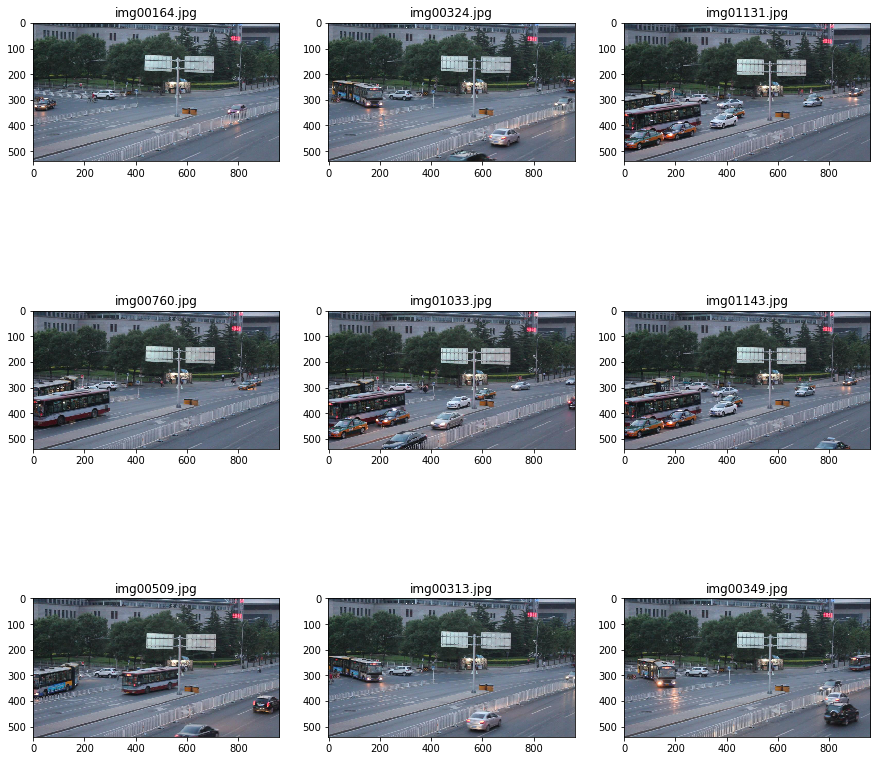

In [11]:
import os
import random
import imageio
import pylab as pl

# Structure des dossier de train 

path = "/home/rblin/Documents/BD/DETRAC/Insight-MVT_Annotation_Train"

dossiers = os.listdir(path)
# print(dossiers)
print("Nombre de sous-dossiers : ", len(dossiers))

# Nombre d'images dans la base de train
nb_im_train = 0
for i in dossiers :
    images = os.listdir(path + "/" + i)
    nb_im_train = nb_im_train + len(images)    

print("Nombre d'images de train total : ", nb_im_train) 

# Taille des images dans la BD 

path_imgs_example = path + "/" + dossiers[0]
images_example = os.listdir(path_imgs_example)
path_im_example = path_imgs_example + "/" + images_example[0]
im_example = imageio.imread(path_im_example)
print("Taille de l'image : ", im_example.shape)

# Regardons le contenu d'un dossier au hasard
index = random.sample(range(0,len(dossiers)),1)

path_images = path + "/" + dossiers[index[0]]
images = sorted(os.listdir(path_images))
print("Nombre d'images dans le sous-dossier " + dossiers[index[0]] + " : ", len(images))
    
indexes_im = random.sample(range(0,len(images)),9)

pl.figure(1)
pl.figure(figsize=(15,15))
pl.clf()
for i in range(9) :
    pl.subplot(3,3,i+1)
    im_temp_path = path_images + "/" + images[indexes_im[i]]
    im_temp = imageio.imread(im_temp_path)
    pl.imshow(im_temp)
    pl.title(images[indexes_im[i]])

## Exploration du fichier xml ##

Chaque fichier xml permet de caractériser chacune des séquences que l'on retrouve frame par frame. On retrouve en caractéristiques générales le nom de la séquence, l'état de la caméra, les conditions météorologiques ainsi que les régions que l'on ignore.

Pour chacune des frames, les véhicules présents dans l'image sont étiquetés et l'on a les coordonnées de la bounding box qui sert à les localiser. On retrouve également des informations concernant leur  vitesse, orientation et longueur de trajectoire.

En ce qui concerne les conditions météorologiques, on retrouve :
* Nuageux ;
* Nuit ;
* Ensoileillé ;
* Pluvieux.

En ce qui concerne les catégories de véhicules, on retrouve :
* Voiture ;
* Bus ;
* Van ;
* Autre.

<Figure size 432x288 with 0 Axes>

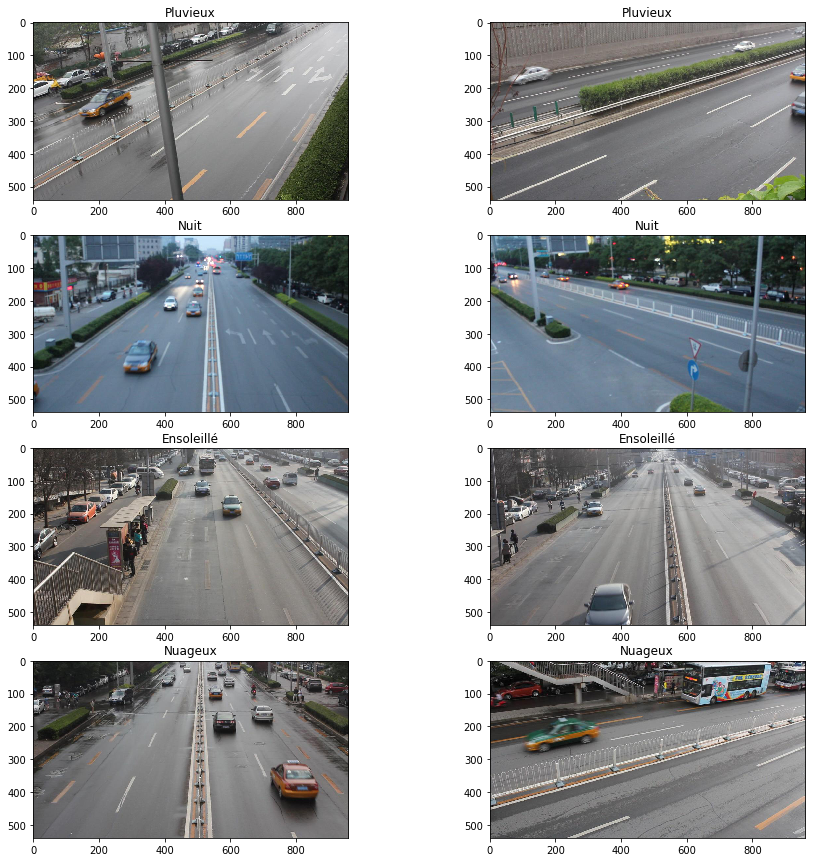

In [13]:
# Affichage d'images de toutes les conditions météorologiques

seq_pluie = ["MVI_63544", "MVI_63562"]

seq_nuit = ["MVI_39761", "MVI_39801"]

seq_soleil = ["MVI_20011", "MVI_20032"]

seq_nuage = ["MVI_40131", "MVI_40171"]

indexes_seq = random.sample(range(0,100),2)

pl.figure(2)
pl.figure(figsize=(15,15))
pl.clf()
for i in range(2) :
    path_pluie_temp = path + "/" + seq_pluie[i]
    path_nuit_temp = path + "/" + seq_nuit[i]
    path_soleil_temp = path + "/" + seq_soleil[i]
    path_nuage_temp = path + "/" + seq_nuage[i]
    imgs_pluie = os.listdir(path_pluie_temp)
    imgs_nuit = os.listdir(path_nuit_temp)
    imgs_soleil = os.listdir(path_soleil_temp)
    imgs_nuage = os.listdir(path_nuage_temp)
    im_pluie_temp_path = path_pluie_temp + "/" + imgs_pluie[indexes_seq[i]]
    im_nuit_temp_path = path_nuit_temp + "/" + imgs_nuit[indexes_seq[i]]
    im_soleil_temp_path = path_soleil_temp + "/" + imgs_soleil[indexes_seq[i]]
    im_nuage_temp_path = path_nuage_temp + "/" + imgs_nuage[indexes_seq[i]]
    im_pluie_temp = imageio.imread(im_pluie_temp_path)
    im_nuit_temp = imageio.imread(im_nuit_temp_path)
    im_soleil_temp = imageio.imread(im_soleil_temp_path)
    im_nuage_temp = imageio.imread(im_nuage_temp_path)
    pl.subplot(4,2,i+1)
    pl.imshow(im_pluie_temp)
    pl.title("Pluvieux")
    pl.subplot(4,2,i+3)
    pl.imshow(im_nuit_temp)
    pl.title("Nuit")
    pl.subplot(4,2,i+5)
    pl.imshow(im_soleil_temp)
    pl.title("Ensoleillé")
    pl.subplot(4,2,i+7)
    pl.imshow(im_nuage_temp)
    pl.title("Nuageux")
    

## Conclusions sur la BD ##

Cette BD est utile notamment pour entraîner un réseau à détecter de nombreux objets dans une image car les images mettent en scène des routes contenant de nombreux véhicules. Cependant, les conditions météorologiques, bien que diversifiées, ne sont pas assez dégradées pour répondre à notre problème. En effet, on ne retrouve ni de tempête de neige ni de brouillard. Cependant, les nombreux reflets sur la chaussée mouillée seraient utiles pour l'apprentissage. 